In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor
warnings.filterwarnings('ignore')

In [61]:
#Import the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train_ID = train['Id']
test_ID = test['Id']



In [62]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


##### We will drop the Id column as it is not necessary for model training.

In [63]:

# Removing the Id column
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [64]:
# Info for train data
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil


##### The train dataset contains 80 columns and 1,460 entries. 
##### The dataset includes 79 feature columns (minus a SalePrice column). Our task is to use these features to predict the house sale price, which is represented by the label column named SalePrice. 

In [65]:
# Info for the test data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

##### The test dataset contains 79 columns and 1,459 entries. 
##### Cheking if both have the same columns features.

In [66]:
# Get the columns of each dataset, excluding 'SalePrice' from the train dataset
columns_train = set(train.columns) - {'SalePrice'}  # Exclude the 'SalePrice' column from the train dataset
columns_test = set(test.columns)

# Find columns that are in train but not in test
column_diff = columns_train - columns_test

# Display the results
print("Columns in train but not in test:", len(column_diff))

Columns in train but not in test: 0


##### Both of the dataset have the same column

In [67]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [68]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Exploratory Data Analysis
#### Distribution of the Target Column (Sales)
##### Let's examine the distribution of house prices.


In [69]:
sale_prices =  train['SalePrice']
sale_prices.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

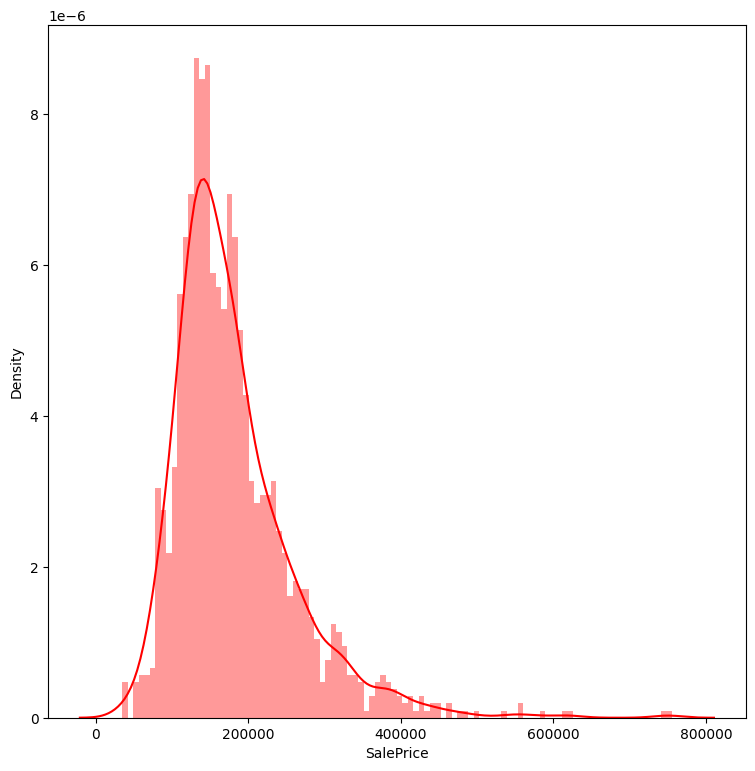

In [70]:
plt.figure(figsize=(9, 9))
sns.distplot(train['SalePrice'], color='r', bins=100, hist_kws={'alpha': 0.4});

### Data distribution
##### Lets, take a look at the data distribution of the variables in the dataset.

In [71]:
dtype_counts = train.dtypes.value_counts()

# Create a DataFrame for the table
dtype_table = dtype_counts.reset_index()
dtype_table.columns = ['Data Type', 'Count']

print(dtype_table)

  Data Type  Count
0    object     43
1     int64     34
2   float64      3


##### The most prominent data types in the dataset is from categorical dataset with 43 columns while the numerical dataset has 37 columns.

#### Numerical Data distribution
##### Next, we’ll examine the distribution of the numerical features. To start, we’ll first excluded the categorical features and then focus on the numerical ones.

In [72]:
numerical = train.select_dtypes(include = ['float64', 'int64'])
numerical.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


#####  We’ll then create plots to show the distribution of all numerical features

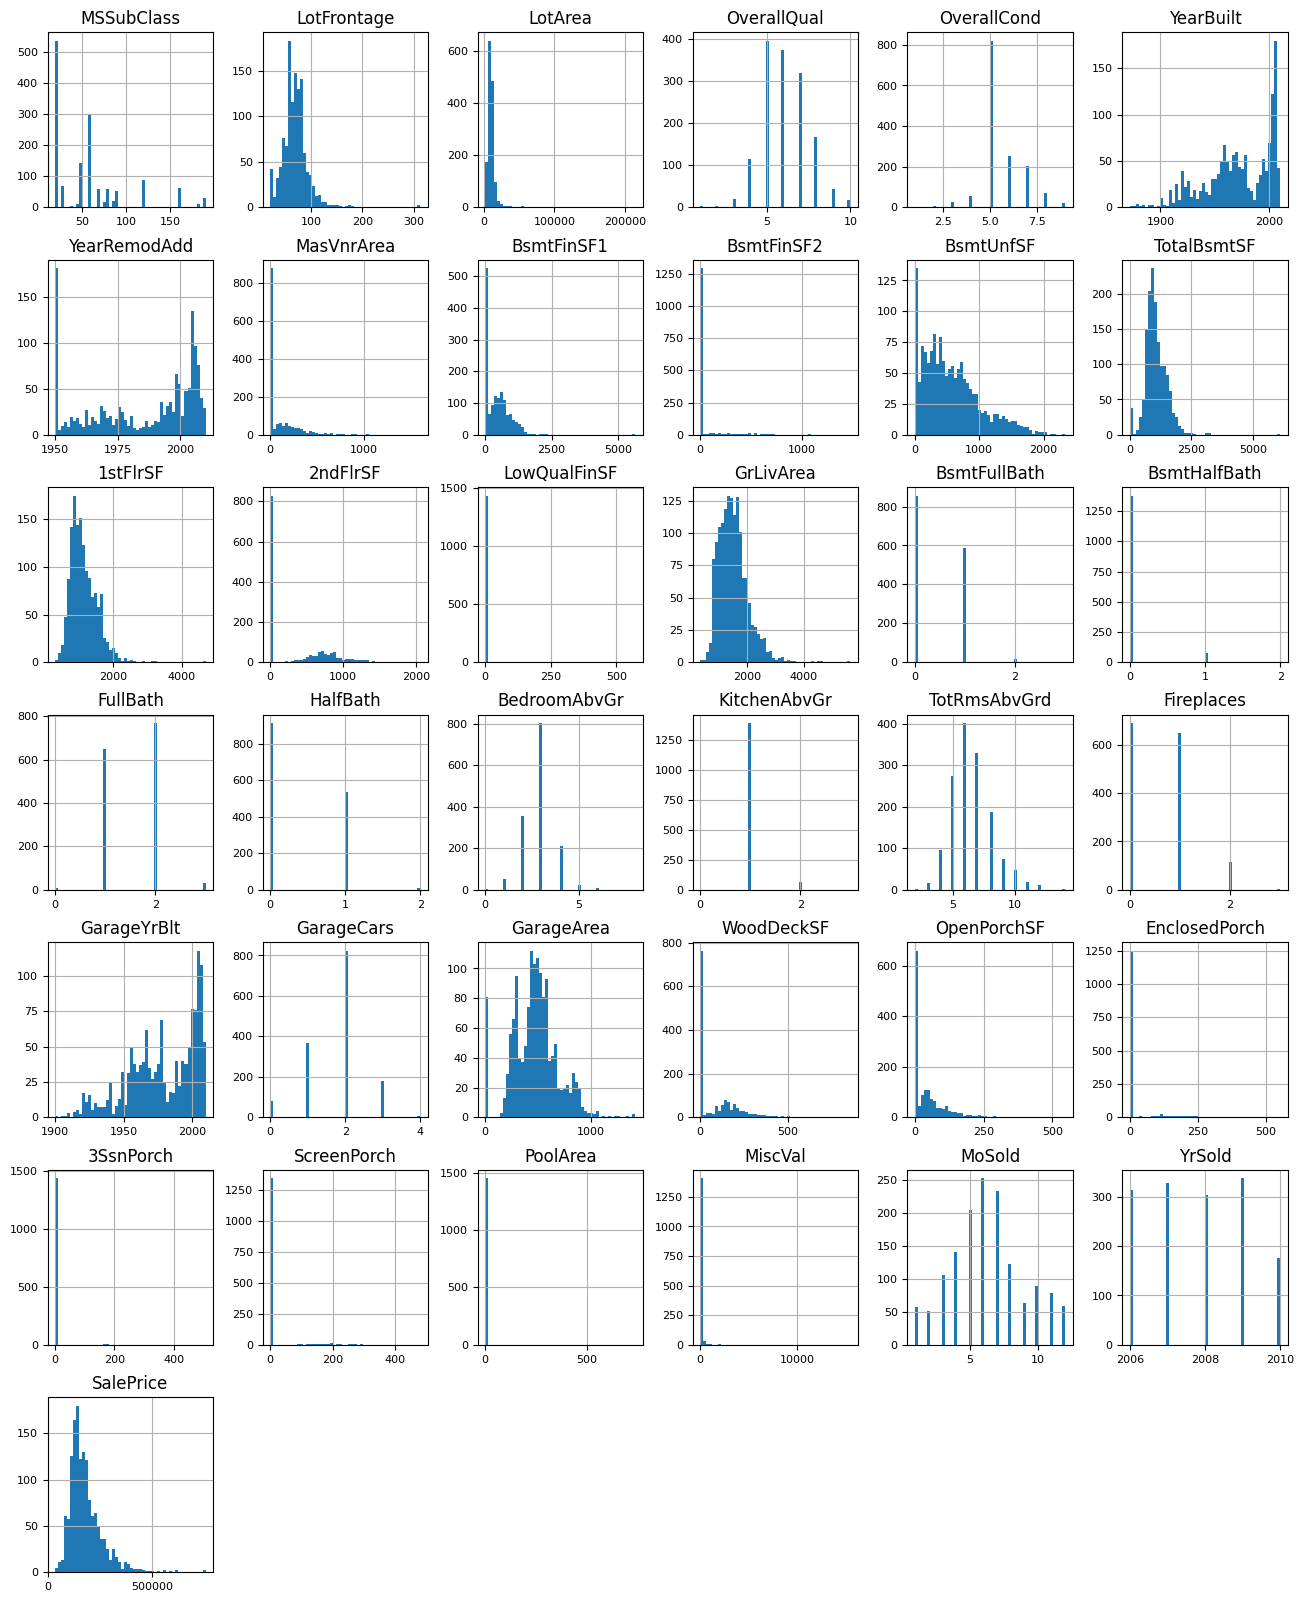

In [73]:
train.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

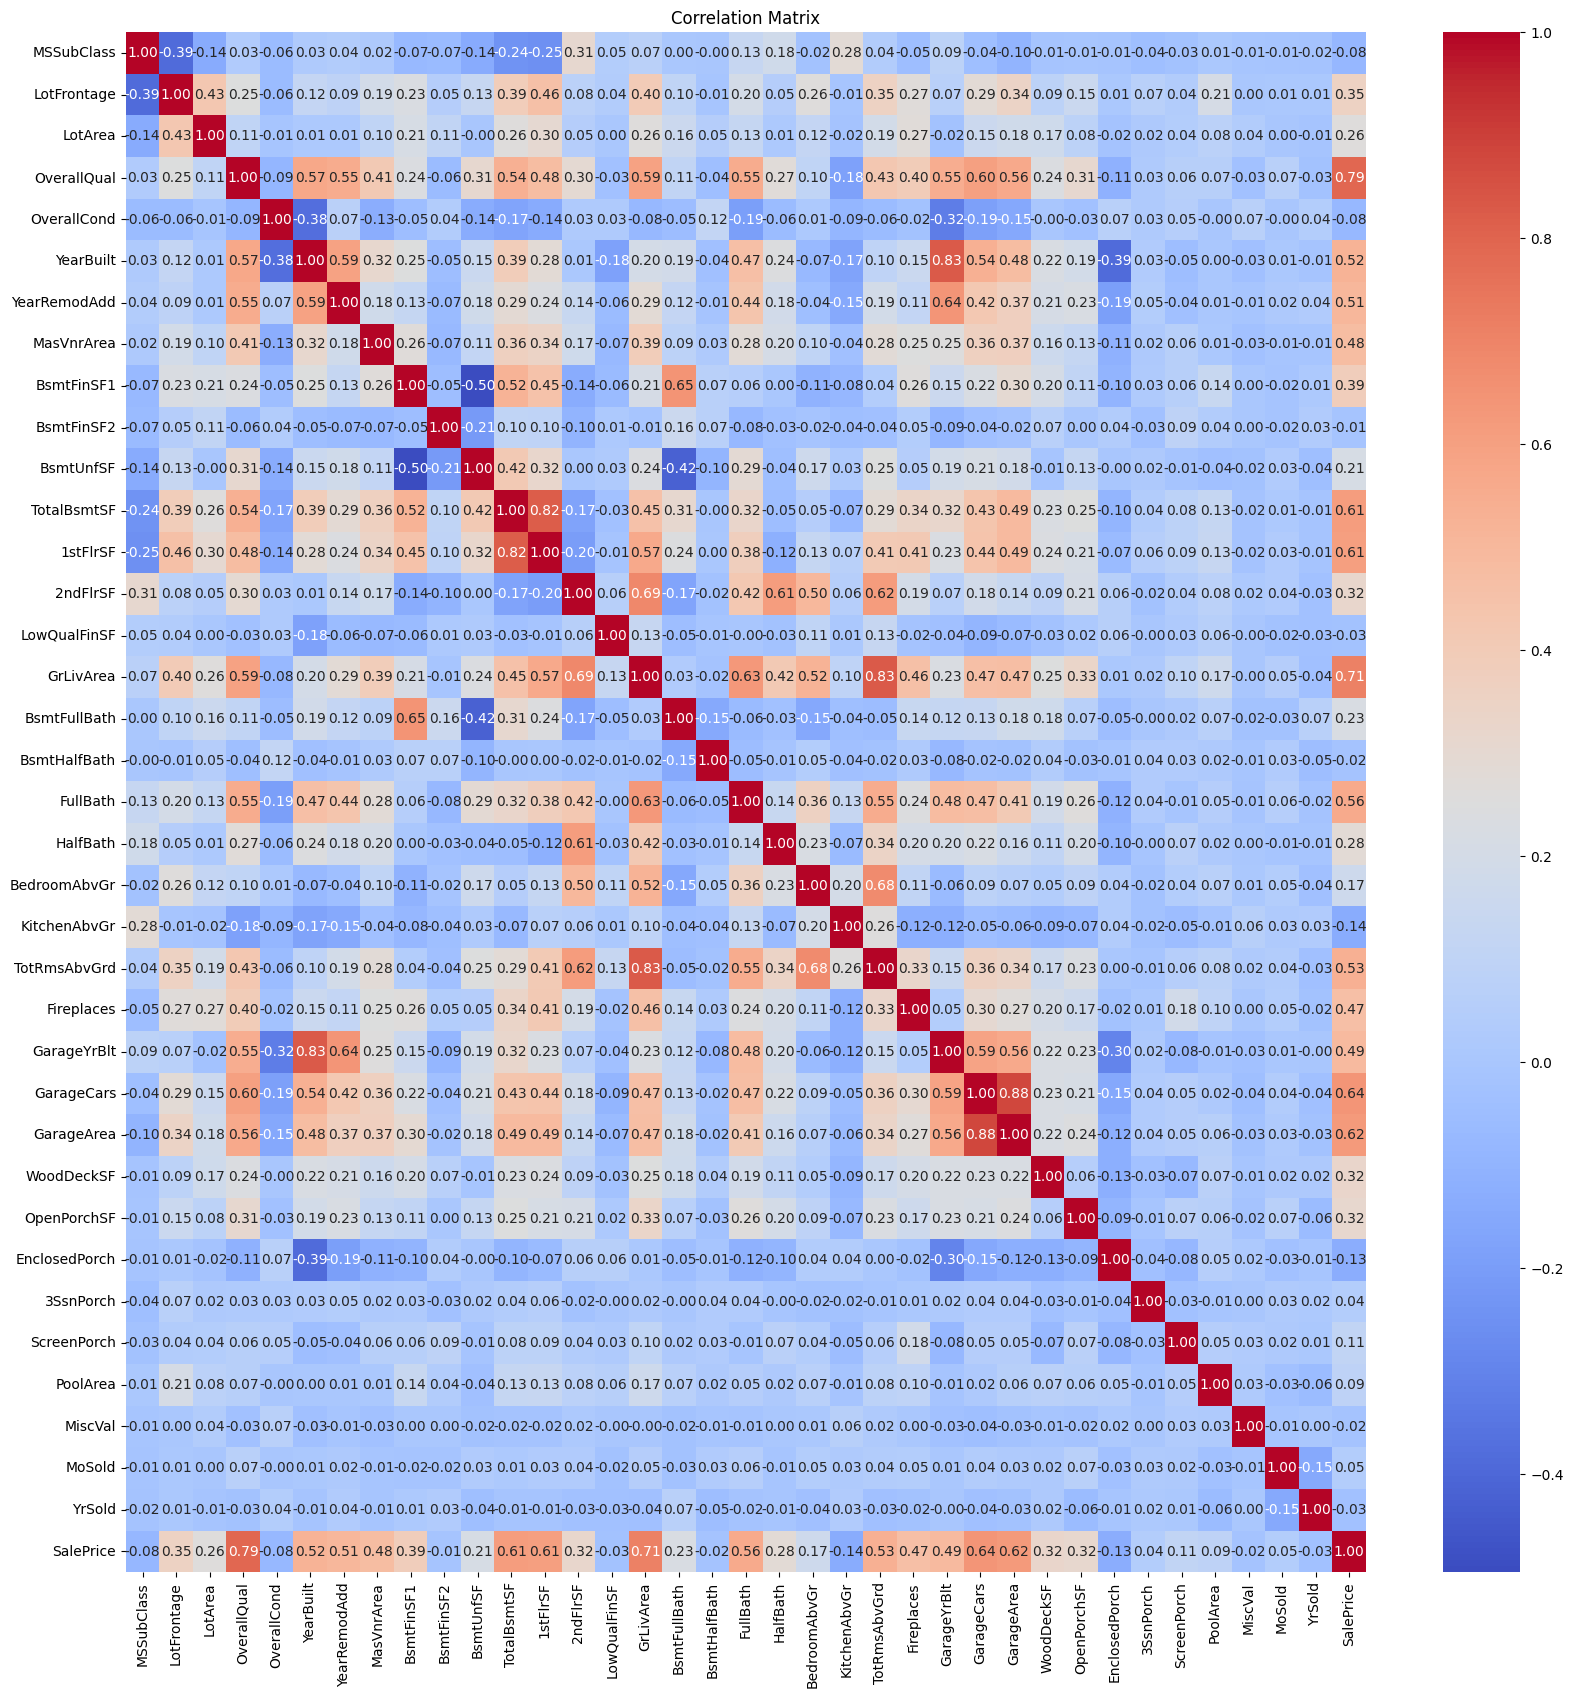

In [74]:
correlation_matrix = numerical.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

##### Find the highest and lowest correlation values with each of the features and the target variable.

In [75]:

# Mask the diagonal to avoid self-correlation (correlation with itself)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Apply the mask to the correlation matrix
masked_correlation_matrix = correlation_matrix.where(~mask)

# Find the highest and lowest correlation values
max_corr = masked_correlation_matrix.max().max()
min_corr = masked_correlation_matrix.min().min()

# Find the pairs with the highest and lowest correlation values
max_corr_pair = masked_correlation_matrix.stack().idxmax()
min_corr_pair = masked_correlation_matrix.stack().idxmin()

print(f"Highest correlation: {max_corr} between {max_corr_pair}")
print(f"Lowest correlation: {min_corr} between {min_corr_pair}")

Highest correlation: 0.882475414281462 between ('GarageArea', 'GarageCars')
Lowest correlation: -0.49525146925701125 between ('BsmtUnfSF', 'BsmtFinSF1')


##### Now, lets gind the highest and lowest correlation values of the features with the target variable (SalePrice).

In [76]:
print (correlation_matrix ['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (correlation_matrix ['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


##### The OvearllQual has the highest corelation with the target variable with 0.790928 while KitchenAbvGr has the lowest corelation with the target variable with -0.135907.

#### Categorical Data distribution
##### We then investigate the distribution of the categorical features. To start, we’ll first excluded the categorical features from the dataset.    

In [77]:
categorical = train.select_dtypes(include=['object'])
categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


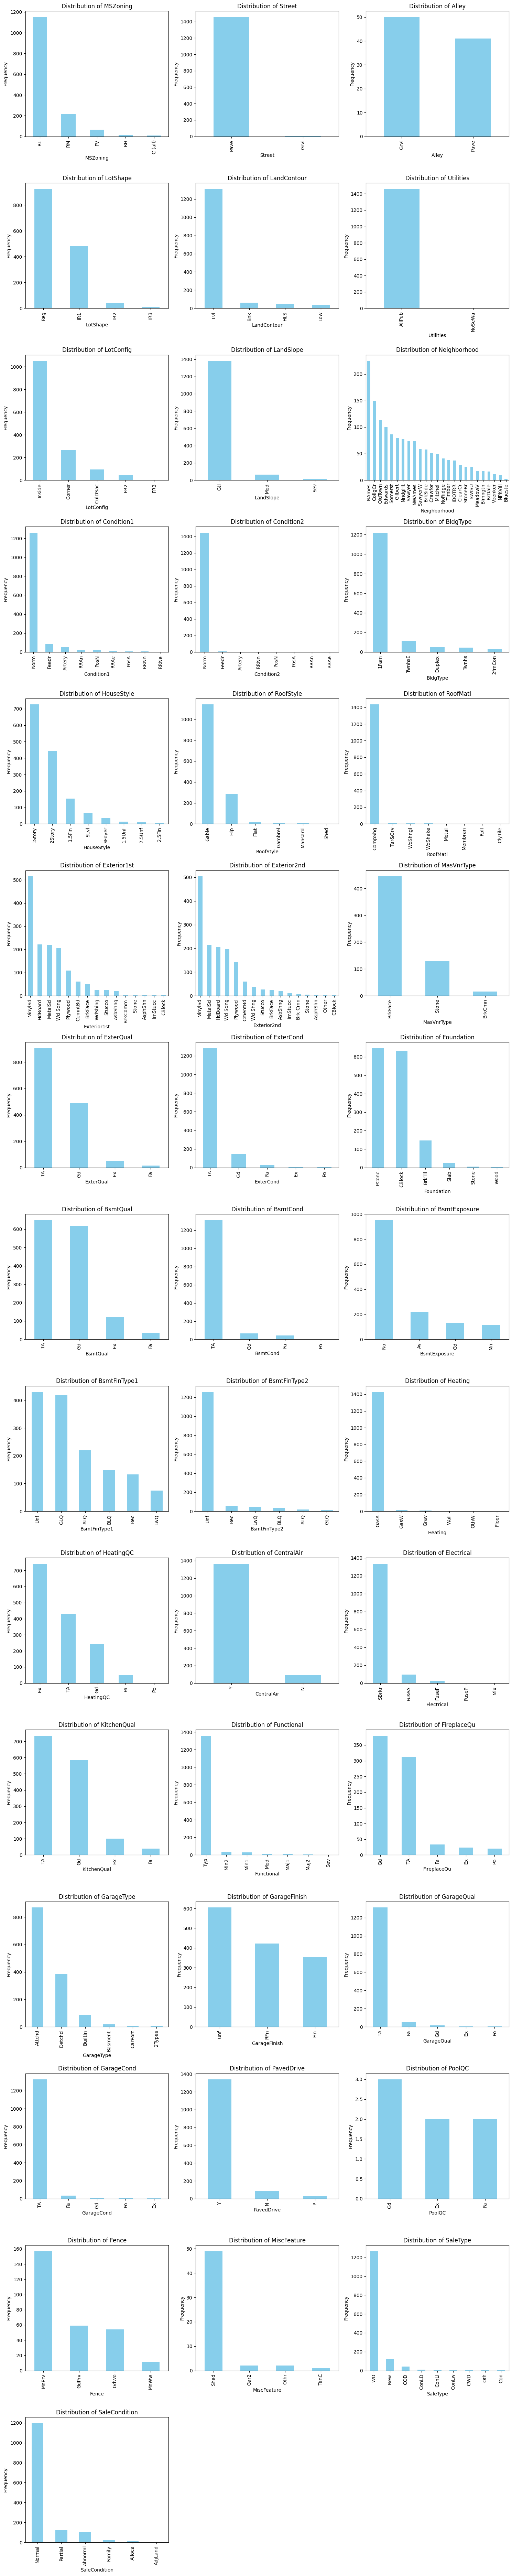

In [78]:
# Number of categorical columns
num_vars = len(categorical.columns)

# Determine grid size
cols = 3  # Number of columns in the grid
rows = -(-num_vars // cols)  # Number of rows needed

# Set up the plot grid
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 5 * rows), tight_layout=True)

# Flatten axes array if necessary
axes = axes.flatten()

# Plot each categorical column
for i, column in enumerate(categorical.columns):
    categorical[column].value_counts().plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Turn off axes for unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

##### Finding the mode for the dataset

In [79]:
mode_values = categorical.mode().iloc[0]
print("Mode of each categorical feature:")
print(mode_values)

Mode of each categorical feature:
MSZoning              RL
Street              Pave
Alley               Grvl
LotShape             Reg
LandContour          Lvl
Utilities         AllPub
LotConfig         Inside
LandSlope            Gtl
Neighborhood       NAmes
Condition1          Norm
Condition2          Norm
BldgType            1Fam
HouseStyle        1Story
RoofStyle          Gable
RoofMatl         CompShg
Exterior1st      VinylSd
Exterior2nd      VinylSd
MasVnrType       BrkFace
ExterQual             TA
ExterCond             TA
Foundation         PConc
BsmtQual              TA
BsmtCond              TA
BsmtExposure          No
BsmtFinType1         Unf
BsmtFinType2         Unf
Heating             GasA
HeatingQC             Ex
CentralAir             Y
Electrical         SBrkr
KitchenQual           TA
Functional           Typ
FireplaceQu           Gd
GarageType        Attchd
GarageFinish         Unf
GarageQual            TA
GarageCond            TA
PavedDrive             Y
PoolQC          

### Finding and Handling missing data
##### Since both train and test data have a categorical columns, we combined both the data in order to make sure we have all the unique classes for each of the features and to handle both dataframe missing data at the same time.

In [80]:
# Combine both of train and test data
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)


In [81]:
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [82]:
all_data.shape

(2919, 79)

##### Analysis on the missing data


In [83]:
# Calculate missing values for each columns
missing_values_all_data =  all_data.isnull().sum() 

# Calculate the percentage of missing values for each column
missing_values_percent_all_data =  100 * all_data.isnull().sum() / len(all_data)

# Combine both missing values and percentage values dataframe
missing_values_table_all_data = pd.concat([missing_values_all_data, missing_values_percent_all_data], axis=1)

# Rename each of the columns
missing_values_table_all_data  = missing_values_table_all_data.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})

# Remove column that does not contain any missing data
missing_values_table_all_data = missing_values_table_all_data[missing_values_table_all_data['Missing Values'] > 0]

# Sort the data from the highest missing columns
missing_values_table_all_data =  missing_values_table_all_data.sort_values(by='Missing Values', ascending=False)

In [84]:
missing_values_table_all_data

,Missing Values,% of Total Values
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
MasVnrType,1766,60.500171
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageFinish,159,5.447071
GarageQual,159,5.447071
GarageCond,159,5.447071


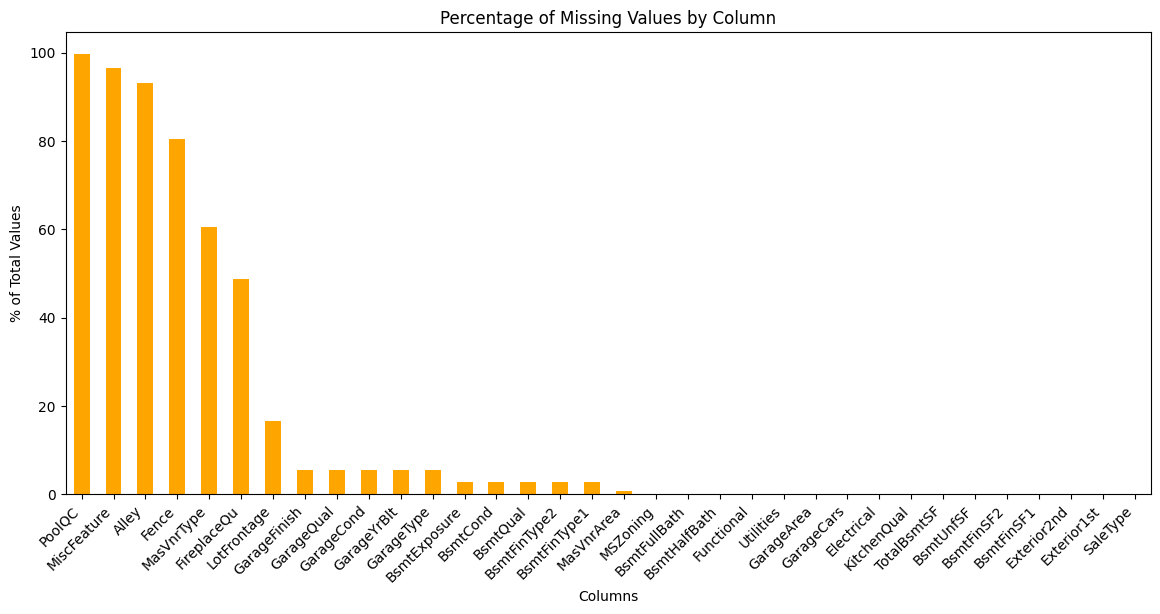

In [85]:
# Plotting missing values
plt.figure(figsize=(14, 6))

missing_values_table_all_data['% of Total Values'].plot(kind='bar', color='orange')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('% of Total Values')
plt.xticks(rotation=45, ha='right')
plt.show()

##### The PoolQC columns with the most missing data with a total of 2909 missing data or 99.657417% missing values.

### Data Imputation
##### Based on the data description we can anlayse the features and impute the missing data, we can impute the missing data using the following methods:


- PoolQC : Based on the data description, NA indicating that the house does not have a pool
- MiscFeature : Based on on the data description, NA indicating that there is no misc feature
- Alley : Based on on the data description, NA indicating that there is no alley access
- Fence : Based on on the data description, NA indicating that there is no fence 
- FireplaceQu : Based on on the data description, NA indicating that there is no fireplace 
- GarageType, GarageFinish, GarageQual and GarageCond : Based on on the data description,  for all these categorical garage-related features, NA indicating that there is no garage.
- BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : Based on on the data description, for all these categorical basement-related features, NaN indicating that there is no basement.

In [86]:
col_to_none = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for col in col_to_none:
    all_data[col].fillna("None", inplace=True)

##### Next we continue with the numerical missing data

In [87]:
# Columns with missing numerical data
all_numerical = all_data.select_dtypes(include=np.number).columns.tolist()
missing_numerical = all_data.select_dtypes(include=['int64', 'float64']).isna().sum()
missing_numerical = missing_numerical[missing_numerical > 0]
missing_numerical 


LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

In [88]:
all_data[missing_numerical.index]


,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
0,65.0,196.0,706.0,0.0,150.0,856.0,1.0,0.0,2003.0,2.0,548.0
1,80.0,0.0,978.0,0.0,284.0,1262.0,0.0,1.0,1976.0,2.0,460.0
2,68.0,162.0,486.0,0.0,434.0,920.0,1.0,0.0,2001.0,2.0,608.0
3,60.0,0.0,216.0,0.0,540.0,756.0,1.0,0.0,1998.0,3.0,642.0
4,84.0,350.0,655.0,0.0,490.0,1145.0,1.0,0.0,2000.0,3.0,836.0
...,...,...,...,...,...,...,...,...,...,...,...
2914,21.0,0.0,0.0,0.0,546.0,546.0,0.0,0.0,NaN,0.0,0.0
2915,21.0,0.0,252.0,0.0,294.0,546.0,0.0,0.0,1970.0,1.0,286.0
2916,160.0,0.0,1224.0,0.0,0.0,1224.0,1.0,0.0,1960.0,2.0,576.0
2917,62.0,0.0,337.0,0.0,575.0,912.0,0.0,1.0,NaN,0.0,0.0


##### We impute the missing numerical data using the KNN imputer

In [89]:
def ImputeNumerical(all_data, numerical_input, col_to_impute):
    from sklearn.impute import KNNImputer
    
    Missing = all_data[numerical_input]
    imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
    imputer.fit(Missing)
    Xtrans = imputer.transform(Missing)
    df_miss = pd.DataFrame(Xtrans,columns = Missing.columns)
    all_data[col_to_impute] = df_miss[col_to_impute]
    return (all_data)

In [90]:
all_data = ImputeNumerical(all_data, all_numerical, 'LotFrontage')

##### Next we proceed with other columns with missing data with no clear indication in the data description

- GarageYrBlt, GarageArea and GarageCars : Impute the missing data with 0 since no garage meaning there is no cars in such garage.
- BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : Impute the missing data with 0 since missing values are likely zero for having no basement
- MasVnrArea and MasVnrType : Impute the missing data with 0 and None indicating that there is no masonry veneer for these houses
- MSZoning (The general zoning classification) : Impute the missing value with the median which is 'RL'
- MSSubClass : Impute teh missing data with None indicating that Na most likely means No building class.
- Exterior1st and Exterior2nd : Impute the missing value with the median value
- KitchenQual: Impute the missing value with the median value
- SaleType : Impute the missing value with the median value

In [91]:
# Imputing the missing data
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
    
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [92]:
#Check if there is any other missing data
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Missing Ratio  0 non-null      float64
dtypes: float64(1)
memory usage: 0.0+ bytes


## Regression
##### Tramsform numerical variable to catogorical variable

In [93]:
import datetime
Yr = all_data['YrSold'].min()
Mo = all_data['MoSold'].min()
t = datetime.datetime(Yr, Mo, 1, 0, 0)

def calculateYrMo (row):   
    return int((datetime.datetime(row.YrSold,row.MoSold,1) - t).total_seconds())

all_data['YrMoSold'] = all_data.apply(lambda row: calculateYrMo(row), axis=1)

In [94]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

##### Pick categorical columns with low number of unique variables (less than 3).

In [95]:
# Select categorical columns with low number of uuique values in a column

low_cols = [cname for cname in all_data.columns 
                        if all_data[cname].nunique() < 3 and 
                        all_data[cname].dtype == "object"]


In [96]:
# Select numeric columns
numeric_cols = [cname for cname in all_data.columns
                if all_data[cname].dtype in ['int64', 'float64']]

In [97]:
# Keep selected columns only
my_cols = low_cols + numeric_cols
all_data = all_data[my_cols].copy()

##### Set a dummy Variables for Categorical Features

In [98]:
all_data = pd.get_dummies(all_data, dtype=int)

In [99]:
all_data.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrMoSold,Street_Grvl,Street_Pave,CentralAir_N,CentralAir_Y
0,65.0,8450,7,2003,2003,196.0,706.0,0.0,150.0,856.0,...,0,0,0,0,0,65750400,0,1,0,1
1,80.0,9600,6,1976,1976,0.0,978.0,0.0,284.0,1262.0,...,0,0,0,0,0,41904000,0,1,0,1
2,68.0,11250,7,2001,2002,162.0,486.0,0.0,434.0,920.0,...,0,0,0,0,0,84153600,0,1,0,1
3,60.0,9550,7,1915,1970,0.0,216.0,0.0,540.0,756.0,...,272,0,0,0,0,2678400,0,1,0,1
4,84.0,14260,8,2000,2000,350.0,655.0,0.0,490.0,1145.0,...,0,0,0,0,0,92016000,0,1,0,1


In [100]:
all_data.shape

(2919, 37)

In [107]:
#clean data
train_clean = all_data[:ntrain]
train_clean['SalePrice'] = sale_prices
train_clean.to_csv('train_clean.csv', index=False)


test_clean = all_data[ntrain:]
test_clean.to_csv('test_clean.csv', index=False)

##### Saperate the train and test data

In [44]:
train = all_data[:ntrain]
test = all_data[ntrain:]
X = train.values
y = sale_prices

In [45]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80,test_size=0.20)

In [46]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Using Linear Regression model from sklearn to predict the price of a house

In [47]:
# Model Building

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
# Predicting the test results
y_pred = model.predict(X_test)

In [49]:
y_pred

array([120614.51947923, 117366.51947923, 106238.51947923, 151058.51947923,
       125638.51947923, 225302.51947923, 249462.51947923, 317160.51947923,
       132158.51947923, 155478.51947923, 193510.51947923, 143470.51947923,
       206982.51947923, 169802.51947923, 106750.51947923, 126102.51947923,
       120742.51947923, 286278.51947923, 178390.51947923,  54619.36592356,
       129566.51947923, 126584.51947923, 261670.51947923, 205310.51947923,
       184846.51947923, 204094.51947923, 135150.51947923, 310358.51947923,
       194302.51947923, 194102.51947923, 347998.51947923,  90326.51947923,
       230118.51947923,  94438.51947923, 187774.51947923, 119626.51947923,
       230134.51947923, 103185.51947923, 206342.51947923, 118798.51947923,
       104982.51947923,  32923.36592356, 197614.51947923, 165542.51947923,
       194222.51947923, 257454.51947923, 126646.51947923, 116670.51947923,
        68859.36592356, 161478.51947923,  86854.51947923, 253862.51947923,
       121582.51947923, 2

In [50]:
y_test

154     125000
876     132250
537     111250
538     158000
436     116000
         ...  
1312    302000
1234    130000
881     187500
649      84500
534     178000
Name: SalePrice, Length: 292, dtype: int64

##### Using the mean absolute error as the performance metric

In [51]:
mae = mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

Mean Absolute Error: 22006.946122528476


##### Predicting the price of the house

In [52]:

test = test.values
new_df = sc.transform(test)
sub = model.predict(new_df)

In [53]:
sub

array([111772.64906885, 164907.14906885, 171795.14906885, ...,
       182008.14906885, 131867.14906885, 256795.64906885])

### Using XGBRegressor model from XGBoost to predict the price of a house

In [54]:
xgb =  XGBRegressor(n_estimators=1000,
                    learning_rate=0.05)

In [55]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [56]:
y_pred = xgb.predict(X_test)

In [57]:
#Calculate MAE
mae = mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

Mean Absolute Error: 17807.94265036387


##### The mean absolute error (MAE) for the XGBregrressor is lower than the linear regression model, thus it is better to use XGBregressor for this regression model.

In [58]:
prediction = xgb.predict(new_df)

In [59]:
output = pd.DataFrame({'Id': test_ID.values, 'SalePrice': prediction})
output.to_csv('submission.csv', index=False)
output.head()

,Id,SalePrice
0,1461,132315.046875
1,1462,163844.953125
2,1463,188055.906250
3,1464,188822.890625
4,1465,196253.687500
